# Coding Challenge

1. Calculate and compare:
- Maximum Drawdown
- Calmar Ratio
- Maximum Drawdown Duration

for 30 large US stocks that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
pd.options.display.float_format = '{:.6f}'.format

In [2]:
dow_jones = pd.read_csv("dow-jones.csv")
dow_jones

,Symbol,Description,Category2,GICS Sector,Market cap,Market Cap Weight,Index Weight,Dividend yield,Country,Action
0,WBA,Walgreen Boots Alliance Inc,Common stocks,Consumer Staples,"$27,884,739,901",0.27%,0.00%,5.82%,USA,Analyze
1,V,Visa Inc Class A,Common stocks,Information Technology,"$420,787,379,804",4.08%,0.00%,0.74%,USA,Analyze
2,CRM,Salesforce.Com Inc,Common stocks,Information Technology,"$187,440,000,000",1.82%,0.00%,0.00%,USA,Analyze
3,CVX,Chevron Corp,Common stocks,Energy,"$294,619,273,279",2.86%,0.00%,3.69%,USA,Analyze
4,PG,Procter & Gamble,Common stocks,Consumer Staples,"$339,221,329,564",3.29%,0.00%,2.52%,USA,Analyze
5,VZ,Verizon Communications Inc,Common stocks,Communication Services,"$156,949,625,356",1.52%,0.00%,6.76%,USA,Analyze
6,WMT,Walmart Stores Inc,Common stocks,Consumer Staples,"$379,144,006,976",3.67%,0.00%,1.59%,USA,Analyze
7,UNH,Unitedhealth Group Inc,Common stocks,Health Care,"$438,353,946,746",4.25%,0.00%,1.40%,USA,Analyze
8,TRV,Travelers Companies Inc,Common stocks,Financials,"$38,030,967,246",0.37%,0.00%,2.25%,USA,Analyze
9,MCD,Mcdonalds Corp,Common stocks,Consumer Discretionary,"$197,226,207,929",1.91%,0.00%,2.13%,USA,Analyze


In [3]:
symbols = dow_jones.Symbol.to_list()
symbols

['WBA',
 'V',
 'CRM',
 'CVX',
 'PG',
 'VZ',
 'WMT',
 'UNH',
 'TRV',
 'MCD',
 'MMM',
 'NKE',
 'MRK',
 'MSFT',
 'JPM',
 'KO',
 'JNJ',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'DIS',
 'CAT',
 'CSCO',
 'AXP',
 'BA',
 'AMGN',
 'AAPL',
 'DOW']

In [4]:
start = "2019-03-01"
end = "2021-06-30"

In [5]:
df = yf.download(symbols, start, end)
df

[*********************100%***********************]  30 of 30 completed


Adj Close                                                         \
                 AAPL       AMGN        AXP         BA        CAT        CRM   
Date                                                                           
2019-03-01  42.277153 167.981628 102.227806 430.299988 123.730698 164.529999   
2019-03-04  42.489777 166.768936 102.321686 422.555695 124.522743 158.500000   
2019-03-05  42.412468 165.925385 102.180878 420.045868 123.433693 156.970001   
2019-03-06  42.168427 160.942871 102.302910 414.518463 121.354568 156.789993   
2019-03-07  41.680340 159.457779 101.251541 412.662964 119.527451 155.600006   
...               ...        ...        ...        ...        ...        ...   
2021-06-23 132.151382 223.615555 161.346069 243.570007 204.533127 241.839996   
2021-06-24 131.864746 225.713898 163.474426 250.570007 209.842819 243.770004   
2021-06-25 131.568222 227.334503 164.679504 248.380005 206.944016 241.869995   
2021-06-28 133.218857 227.484390 160.140976 239.960007 206.905777 244.570007   
2021-06-29 134.750916 227.128433 159.625900 235.759995 205.786423 245.809998   

                                                      ...    Volume            \
                CSCO        CVX        DIS       DOW  ...       MRK      MSFT   
Date                                                  ...                       
2019-03-01 44.839619 100.917931 112.633484       NaN  ...  10624205  23501200   
2019-03-04 44.621563 100.992363 112.949623       NaN  ...   8522755  26608000   
2019-03-05 44.743675 101.959938 112.623604       NaN  ...   8698190  19538300   
2019-03-06 45.066383 102.158409 113.463341       NaN  ...   8167169  17687000   
2019-03-07 44.734947 100.843498 112.633484       NaN  ...  10925505  25339000   
...              ...        ...        ...       ...  ...       ...       ...   
2021-06-23 49.312160  98.215591 175.330002 57.212440  ...   9539100  19518700   
2021-06-24 49.330845  99.019661 177.929993 57.176197  ...   8601900  21446900   
2021-06-25 49.592552  99.167534 178.350006 57.339275  ...  50285200  25611100   
2021-06-28 49.499088  96.108398 176.570007 56.985943  ...   8796200  19590000   
2021-06-29 49.452351  95.895836 173.929993 57.058418  ...   7696600  19937800   

                                                                       \
                 NKE        PG      TRV       UNH         V        VZ   
Date                                                                    
2019-03-01   6314900   7733200  1360400   6921300   7016800  10942700   
2019-03-04   7339500   6895300   907900   8646300   6979700  13674400   
2019-03-05   4976300   6274600  1324200   6924500   9678600  15749500   
2019-03-06   3198000   4622300   896700   4878700   8186400  13935500   
2019-03-07   4321800   8408600  1141100   5033500   8761700  12644200   
...              ...       ...      ...       ...       ...       ...   
2021-06-23   4566000   5796000   649600   2942100   6814700  16524500   
2021-06-24  11420500   6056700  1026900   3309100   4611500  15386200   
2021-06-25  46285400  24504900  1239700  16928900   7825200  14540300   
2021-06-28  13133300   6065400   873300   3193300   9301700  13754900   
2021-06-29  10279900   5792300   701400   2458800  11897700  15313000   

                                
                 WBA       WMT  
Date                            
2019-03-01  10298900  10352500  
2019-03-04  10870500   7683800  
2019-03-05  11956100   6119300  
2019-03-06  15392500   4696600  
2019-03-07   9695800   6126600  
...              ...       ...  
2021-06-23   3489600   6463500  
2021-06-24   3876900   7814700  
2021-06-25   4094500   9546900  
2021-06-28   3869200   5183000  
2021-06-29   4223600  11987500  

[588 rows x 180 columns]

In [6]:
returns = np.log(df.Close / df.Close.shift()) # daily log returns
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-04,0.005017,-0.007245,0.000918,-0.018161,0.006381,-0.037338,-0.004875,0.000737,0.002803,NaN,...,-0.003435,-0.002402,-0.017593,0.004359,-0.006637,-0.042025,-0.010154,-0.012721,-0.028476,-0.000817
2019-03-05,-0.001821,-0.005071,-0.001377,-0.005957,-0.008784,-0.009700,0.002733,0.009535,-0.002891,NaN,...,0.004047,-0.005001,-0.002338,0.002223,0.004078,0.022663,-0.000068,-0.002849,-0.020915,0.004995
2019-03-06,-0.005771,-0.030489,0.001194,-0.013246,-0.016988,-0.001147,0.007187,0.001945,0.007428,NaN,...,-0.011572,0.000448,-0.003635,-0.001616,-0.006730,-0.009823,-0.000947,-0.007158,-0.036952,-0.000814
2019-03-07,-0.011642,-0.009270,-0.010330,-0.004486,-0.015170,-0.007619,-0.007381,-0.012955,-0.007341,NaN,...,-0.003846,-0.012245,0.001526,-0.003848,-0.002355,-0.009963,-0.006652,0.011074,-0.021673,-0.008278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,-0.002092,-0.005014,0.009198,-0.000862,0.003092,-0.005238,-0.009432,-0.001223,0.010492,-0.005527,...,-0.008039,-0.000904,0.004669,-0.001428,-0.002701,-0.007882,-0.005312,-0.005336,0.005970,-0.007839
2021-06-24,-0.002171,0.009340,0.013105,0.028334,0.025629,0.007949,0.000379,0.008153,0.014720,-0.000634,...,0.010267,0.005339,0.003750,0.000677,0.013899,0.008333,0.006625,0.005336,0.000384,0.006963
2021-06-25,-0.002251,0.007154,0.007345,-0.008779,-0.013910,-0.007825,0.005291,0.001492,0.002358,0.002848,...,0.010940,-0.006282,0.144372,0.014182,0.011601,0.015128,0.004561,0.000177,0.001151,0.011763


In [7]:
def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns) / cummax
    max_dd = drawdown.max()
    return max_dd

In [8]:
returns.apply(max_drawdown).sort_values()

WMT    0.165325
VZ     0.195425
PG     0.231556
AMGN   0.250658
JNJ    0.278265
MRK    0.278574
MSFT   0.282353
AAPL   0.314273
INTC   0.355776
CRM    0.357158
UNH    0.361763
V      0.363649
KO     0.375353
MCD    0.380059
HD     0.384058
CAT    0.389823
IBM    0.395445
NKE    0.399503
CSCO   0.428079
HON    0.433171
DIS    0.434450
JPM    0.439861
GS     0.459515
MMM    0.463007
TRV    0.472389
WBA    0.482237
AXP    0.496385
CVX    0.571992
DOW    0.631552
BA     0.780420
dtype: float64

In [25]:
def calmar(series):
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
        calmar = cagr / max_dd
        return calmar

In [27]:
calmar_rank = returns.apply(calmar).sort_values(ascending=False)
calmar_rank

AAPL    2.001091
MSFT    1.626173
WMT     0.944071
NKE     0.709998
HD      0.681295
GS      0.677249
UNH     0.633495
PG      0.617489
V       0.595229
CAT     0.543465
CRM     0.526506
DIS     0.457477
AMGN    0.428549
JPM     0.413496
AXP     0.388602
HON     0.347827
JNJ     0.272450
MCD     0.259388
KO      0.203275
DOW     0.167888
TRV     0.108880
INTC    0.076691
IBM     0.048882
CSCO    0.029014
MRK    -0.013884
VZ     -0.043429
MMM    -0.052030
CVX    -0.117559
WBA    -0.209227
BA     -0.301639
dtype: float64

In [28]:
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns) / cummax
    
    begin = drawdown[drawdown == 0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    periods = end - begin
    max_ddd = periods.max()
    return max_ddd.days

In [29]:
returns.apply(max_dd_duration).sort_values()

UNH     121
MSFT    146
AAPL    154
V       191
NKE     202
HD      210
WMT     211
JNJ     251
CAT     251
PG      260
HON     293
CRM     301
GS      340
AMGN    344
AXP     370
DIS     372
JPM     378
MCD     403
KO      494
IBM     509
INTC    522
MRK     544
VZ      557
TRV     602
DOW     649
CSCO    715
MMM     798
CVX     813
BA      848
WBA     848
dtype: int64

2. Determine the best-performing stock and the worst-performing stock according to the Calmar Ratio.

In [31]:
calmar_rank.head(1) # best

AAPL   2.001091
dtype: float64

In [32]:
calmar_rank.tail(1) # worst

BA   -0.301639
dtype: float64

3. Compare Calmar Ratio and Sharpe Ratio. Does the ranking change?

In [19]:
def sharpe(series, rf = 0):
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [23]:
sharpe_rank = returns.apply(sharpe).sort_values(ascending = False)
sharpe_rank

AAPL    1.353085
MSFT    1.159601
NKE     0.746798
HD      0.713411
GS      0.702580
V       0.620562
WMT     0.612168
UNH     0.571638
CAT     0.547106
PG      0.545298
DIS     0.494360
CRM     0.438722
JPM     0.431454
HON     0.428301
AXP     0.397935
AMGN    0.347005
MCD     0.326122
JNJ     0.312588
KO      0.287110
DOW     0.210039
TRV     0.139895
INTC    0.063956
IBM     0.060675
CSCO    0.037925
MRK    -0.015403
VZ     -0.042531
MMM    -0.079524
CVX    -0.158618
WBA    -0.277764
BA     -0.430234
dtype: float64

<Axes: >

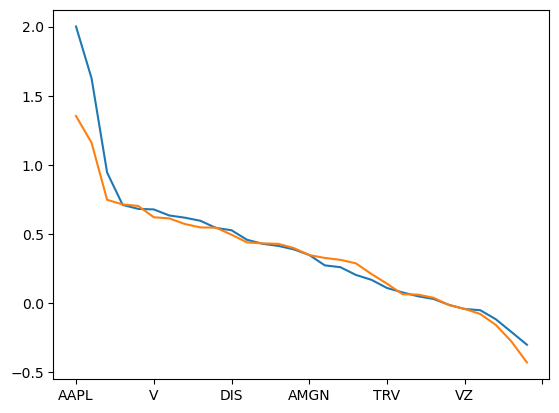

In [34]:
calmar_rank.plot()
sharpe_rank.plot()

In [36]:
merged = pd.concat([calmar_rank, sharpe_rank], axis = 1)
merged

,0,1
AAPL,2.001091,1.353085
MSFT,1.626173,1.159601
WMT,0.944071,0.612168
NKE,0.709998,0.746798
HD,0.681295,0.713411
GS,0.677249,0.702580
UNH,0.633495,0.571638
PG,0.617489,0.545298
V,0.595229,0.620562
CAT,0.543465,0.547106


In [ ]:
merged.columns = ["Sortino", "Sharpe"]